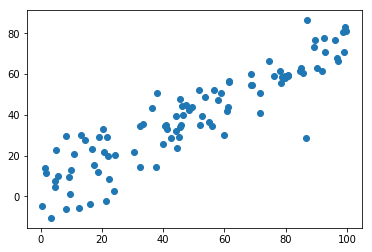

In [7]:
import numpy as np
import matplotlib.pylab as plt
X = np.empty(shape=[100,2])
X[:,0] = np.random.uniform(0.,100.,size = 100)
X[:,1] = 0.75*X[:,0] + 3. + np.random.normal(0.,10.,size=100)
plt.scatter(X[:,0],X[:,1])
plt.show()

# demean

In [8]:
def demean(X):
    return X - np.mean(X,axis = 0)

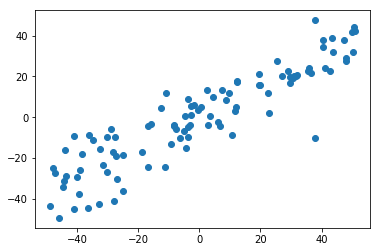

In [9]:
X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

1.可以看到 均值之后的样本分布与 均值之前的样本的分布是一样的，可以看作是坐标轴的平移，这方便我们之后的计算.   
2.demean之后，X[:,1]与X[:,0]之间的关系为：X[:,1] = 0.75*X[:,0] +噪声. 直线与x轴的夹角为artan（0.75=3/4）,符合直角三角形(3,4,5),所以,代表其方向的单位向量为（3/5=0.6,4/5=0.8）=w


In [4]:
# 根据我们理论推导出来的PCA 的效用函数 及其求导， 编程实现
def J(X,w):
    '''
    X:为样本矩阵
    w：为样本所要映射的方向向量
    '''
    return (X.dot(w)).T.dot(X).dot(w)/len(X)

def dJ_math(X,w):
    '''
    X:为样本矩阵
    w：为样本所要映射的方向向量
    '''
    return X.T.dot(X).dot(w)*2./len(X)

# 用定义法求 效用函数J的导数
def dJ_debug(X,w,delta = 0.0001):
    dJ = np.empty(shape = w.shape)
    for i in range(X.shape[1]):
        w_sub = w.copy()
        w_sub[i] -= delta
        w_plus = w.copy()
        w_plus[i] += delta
        dJ[i] = (J(X,w_plus) - J(X,w_sub))/(2*delta)
    return dJ

# 注意 我们假设w是单位的方向向量，但是，在每次迭代更新w时，并不能保证w一直是单位向量，故需要将w单位化
def unit_w(w):
    return w/np.linalg.norm(w)

def Gradient_ascent(X, init_w,dJ,eta = 0.001, n_iters = 1e4, epsilon = 1e-8):
    '''
    n_iters；迭代的最大次数
    epsilon : 残差（当前函数值与上次函数值之间的差值）的最小值
    '''
    w = init_w
    w = unit_w(w)
    i_iters = 0
    while i_iters < n_iters:
        i_iters +=1
        last_w = w
        w = w + eta*dJ(X,w)
        w = unit_w(w)
        if J(X,w) -  J(X,last_w) <= epsilon:
            break 
    return w


注意：   
(1)如果还像线性回归那样,将init_w设置为0,根据效用函数J，得知其处在函数的最低点，为极值点，故跳不出去  
也可以从两一方面解释，init_w设置为0,代入效用函数的梯度表达式，得到的梯度也为0,因此w将永远是0,所以我们需要随机的生成一个init_w  
(2)不能使用Standard Scaler标准化数据,若标准化，样本的方差就为1了,不存在方差最大化的问题了（与KNN不用标准化是一个原理）

In [5]:
init_w = np.random.random(size = X.shape[1])
w = Gradient_ascent(X_demean, init_w, dJ_math)
w

array([0.76540314, 0.64355111])

In [6]:
w1 = Gradient_ascent(X_demean, init_w, dJ_debug)
w1

array([0.76540314, 0.64355111])

经过算法训练得到的w与我们理论的w是一致的,我们的算法得到了验证

# 运用可视化的方法验证我们算法的正确性

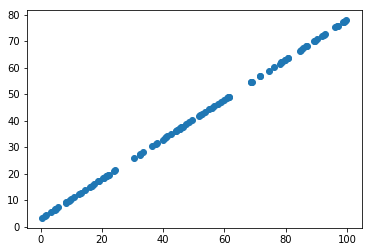

In [11]:
X[:,1] = 0.75*X[:,0] + 3. # X[:,0]保持不变
plt.scatter(X[:,0],X[:,1])
plt.show()

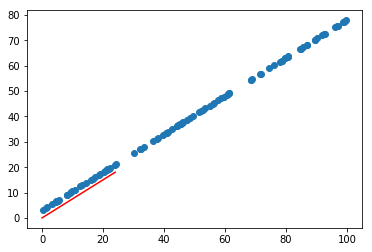

In [15]:
X[:,1] = 0.75*X[:,0] + 3. # X[:,0]保持不变
plt.scatter(X[:,0],X[:,1])

X_demean = demean(X)
init_w = np.random.random(size = X.shape[1])
w2 = Gradient_ascent(X_demean, init_w, dJ_math)
plt.plot([0,w2[0]*30],[0,w2[1]*30],color = 'r')
plt.show()